*`torchvision` - base domain library for Pytorch computer vision
*`torchvision.datasets` - get datasets and data loading functions for computer vision here
*`torchvision.models` - get pretrained computer vision models that you can leverage or your own problems
*`torchvision.transforms` - functions for manipulating your vision data (images) into suitable for use in model
*`torch.utils.data.Dataset` - Base dataset class for pytorch
*`torch.utils.data.DataLoader` - creates a python interable over a dataset

In [5]:
import torch 
from torch import nn

import torchvision 
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [6]:
torch.__version__, torchvision.__version__

('2.9.1+cu128', '0.24.1+cu128')

In [7]:
# Getting a dataset
# Fashion MNIST dataset

train_dataset = datasets.FashionMNIST(
    root="data",
    train=True, # train data
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None
)

test_dataset = datasets.FashionMNIST(
    root="data",
    train=False, # train data
    download=True,
    transform=ToTensor(), # how to transform the data
    target_transform=None
)

In [8]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [9]:
class_names = train_dataset.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
train_dataset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [11]:
train_dataset.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [12]:
image = train_dataset[0][0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [13]:
image.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '9')

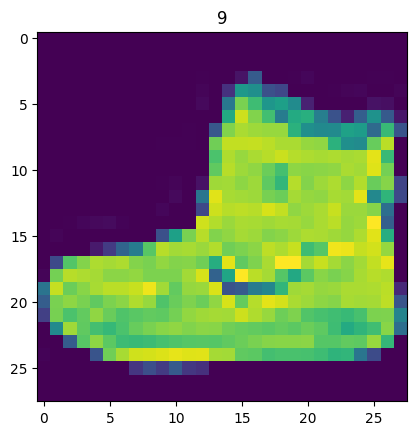

In [14]:
# visualise
image, label = train_dataset[0]
plt.imshow(image.squeeze())
plt.title(label)

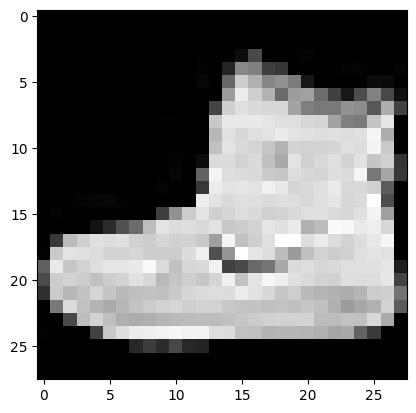

In [15]:
plt.imshow(image.squeeze(), cmap="gray")

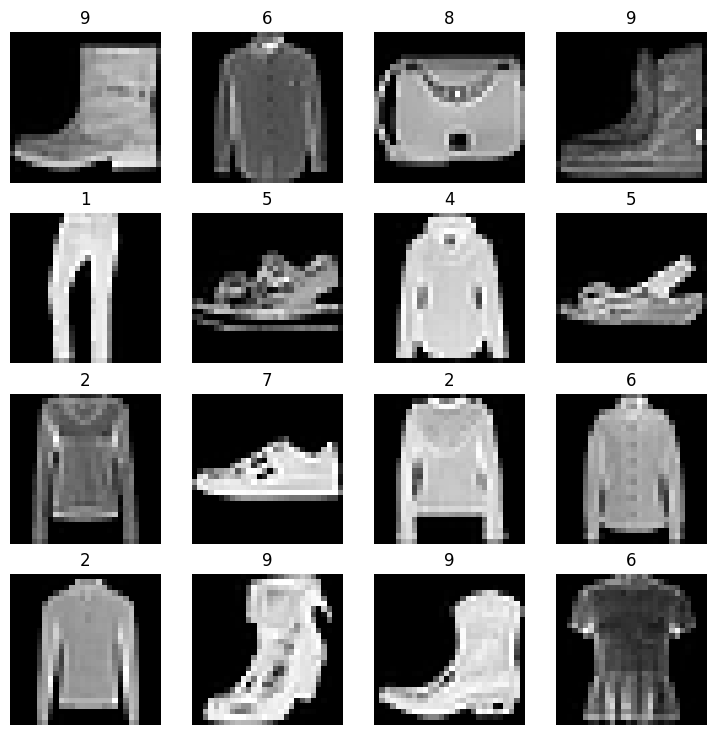

In [16]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    image, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)

In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [18]:
print(f"Dataloaders: {train_dataset, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of 32")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of 32")

Dataloaders: (Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor(), <torch.utils.data.dataloader.DataLoader object at 0x7f8466882210>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [19]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

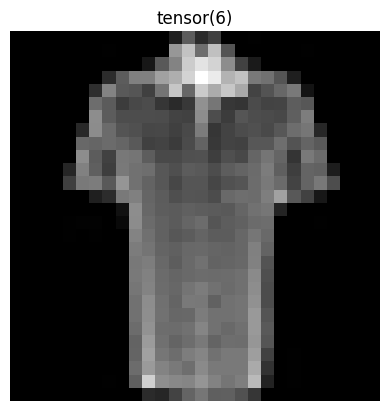

In [20]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)

In [21]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [22]:
from torch import nn
class FashionModel(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units,),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self,x):
        return self.layer_stack(x)

In [23]:
import torch
torch.manual_seed(42)

model_0 = FashionModel(
    input_shape=28*28,
    hidden_units=10,
    output_shape=10
).to("cpu")

model_0

FashionModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1,1,28,28])
print(f"{model_0(dummy_x).squeeze()} -> logits")

tensor([-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
        -0.1004,  0.0157], grad_fn=<SqueezeBackward0>) -> logits


In [25]:
import requests 
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("already exists")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

already exists


In [26]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                         lr=0.1)

In [27]:
from timeit import default_timer as timer 

def print_train_time(start:float,
                     end: float,
                     device: torch.device= None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [28]:
# training model
from tqdm.auto import tqdm

torch.manual_seed(42)
start = timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"EpochL {epoch} \n-----")

    train_loss = 0

    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Trained on {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    
    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")

end = timer()
total_train_time = print_train_time(start=start,
                                    end=end,
                                    device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

EpochL 0 
-----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


 33%|███▎      | 1/3 [00:04<00:08,  4.37s/it]


Train loss: 0.5903891921043396 | Test loss: 0.5095 | Test accuracy: 82.0387
EpochL 1 
-----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


 67%|██████▋   | 2/3 [00:10<00:05,  5.38s/it]


Train loss: 0.47633200883865356 | Test loss: 0.4799 | Test accuracy: 83.1969
EpochL 2 
-----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


100%|██████████| 3/3 [00:15<00:00,  5.06s/it]


Train loss: 0.4550333023071289 | Test loss: 0.4766 | Test accuracy: 83.4265
Train time on cpu: 15.180 seconds


In [29]:
str(next(model_0.parameters()).device)

'cpu'

In [30]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns dictionary containing the results of model"""
    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        loss/= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 966.79it/s]


{'model_name': 'FashionModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [31]:
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [32]:
class FashionModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)

In [33]:
next(model_0.parameters()).device

device(type='cpu')

In [34]:
torch.manual_seed(42)
model_1 = FashionModelV1(input_shape=784,
                         hidden_units=10,
                         output_shape=10)


In [35]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [36]:
import torch 

def train_step(epochs: int,
               data_loader: torch.utils.data.DataLoader,
               model: nn.Module,
               loss_fn: nn.Module,
               optimizer: nn.Module):
    start = timer()
    
    for epoch in tqdm(range(epochs)):
        print(f"Epoch: {epoch} \n----")
        train_loss = 0

        for batch, (X,y) in enumerate(data_loader):
            model.train()

            y_pred = model(X)

            loss=loss_fn(y_pred, y)
            train_loss += loss

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            
            if batch % 400 == 0:
                print(f"Trained on {batch * len(X)}/{len(train_dataloader.dataset)} samples")

        train_loss /= len(data_loader)
    
    end = timer()
    print_train_time(start=start, end=end)
        
    

In [37]:
train_step(epochs=3,
           data_loader=train_dataloader,
           model=model_1,
           loss_fn=loss_fn,
           optimizer=optimizer)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


 33%|███▎      | 1/3 [00:03<00:06,  3.28s/it]

Epoch: 1 
----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


 67%|██████▋   | 2/3 [00:06<00:02,  2.96s/it]

Epoch: 2 
----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


100%|██████████| 3/3 [00:08<00:00,  2.88s/it]

Train time on None: 8.635 seconds


In [38]:
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn):
    start = timer()
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            test_pred = model(X_test)

            test_loss += loss_fn(test_pred, y_test)

            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")
    end = timer()
    print_train_time(start=start, end=end)

test_step(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)



Train loss: 0.4550333023071289 | Test loss: 0.9524 | Test accuracy: 65.5851
Train time on None: 0.289 seconds


In [39]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

100%|██████████| 313/313 [00:00<00:00, 989.15it/s]


{'model_name': 'FashionModelV1',
 'model_loss': 0.9523775577545166,
 'model_acc': 65.58506389776358}

In [40]:
class FashionMOdelV2(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int, 
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
                      # hyperparameters -> 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)

        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifer(x)
        # print(x.shape)

        return x

In [41]:
torch.manual_seed(42)
model_2 = FashionMOdelV2(input_shape=1,
                         hidden_units=10,
                         output_shape=10)

In [42]:
torch.manual_seed(42)

# batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape} ")
print(f"Single image shape: {test_image.shape}")
print(f"Test image \n : {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) 
Single image shape: torch.Size([3, 64, 64])
Test image 
 : tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [

In [43]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [44]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

conv_output = conv_layer(test_image)
conv_output

tensor([[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
          -3.1604e-01,  4.5352e-01],
         [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
          -2.3216e-01,  7.7080e-01],
         [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
          -5.7622e-01,  4.2301e-01],
         ...,
         [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
           3.5645e-01,  2.8384e-01],
         [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
          -7.2258e-01, -8.3858e-02],
         [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
           3.2819e-01,  3.6604e-01]],

        [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
          -7.5413e-01,  4.0612e-01],
         [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
           2.5263e-01,  3.8844e-01],
         [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
           8.4869e-01, -1.5706e-01],
         ...,
         [-5.6923e-03, -5

In [45]:
test_image.shape, conv_output.shape

(torch.Size([3, 64, 64]), torch.Size([10, 64, 64]))

In [46]:
test_image.shape, test_image.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [47]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)

print(f"Input shape: {test_image.shape}")

max_output = conv_layer(test_image.unsqueeze(0))
print(f"Shape after convolution layer: {max_output.shape}")

max_output = maxpool_layer(max_output)
print(f"Shape after maxpool layer: {max_output.shape}")

Input shape: torch.Size([3, 64, 64])
Shape after convolution layer: torch.Size([1, 10, 64, 64])
Shape after maxpool layer: torch.Size([1, 10, 32, 32])


In [48]:
random_tensor = torch.randn(size=(1,2,2))
print(f"Input shape: {random_tensor.shape}")

# conv_output = conv_layer(random_tensor.unsqueeze(dim=0))
# print(f"Conv Layer shape: {conv_output.shape}")

# max_output = maxpool_layer(conv_output)
# print(f"Max pool Layer shape: {max_output.shape}")

Input shape: torch.Size([1, 2, 2])


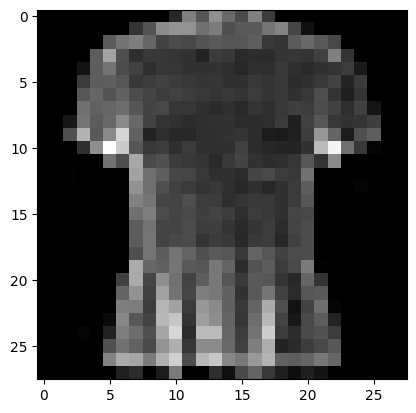

In [49]:
torch.manual_seed(42)
plt.imshow(image.squeeze(), cmap="gray")

In [50]:
image.shape

torch.Size([1, 28, 28])

In [51]:
model_2(image.unsqueeze(0))

tensor([[ 0.0300, -0.0610,  0.0485, -0.0278, -0.0125,  0.0172, -0.0056, -0.0121,
          0.0243,  0.0095]], grad_fn=<AddmmBackward0>)

In [52]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [53]:
# training model_2
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_start = timer()

train_step(3, train_dataloader, model_2, loss_fn, optimizer)
test_step(model_2, test_dataloader, loss_fn, accuracy_fn)

train_stop = timer()
print_train_time(start=train_start, end=train_stop)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


 33%|███▎      | 1/3 [00:11<00:23, 11.85s/it]

Epoch: 1 
----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


 67%|██████▋   | 2/3 [00:24<00:12, 12.16s/it]

Epoch: 2 
----
Trained on 0/60000 samples
Trained on 12800/60000 samples
Trained on 25600/60000 samples
Trained on 38400/60000 samples
Trained on 51200/60000 samples


100%|██████████| 3/3 [00:35<00:00, 11.85s/it]


Train time on None: 35.560 seconds

Train loss: 0.4550333023071289 | Test loss: 0.3692 | Test accuracy: 86.6713
Train time on None: 1.528 seconds
Train time on None: 37.102 seconds


37.10175555100068

In [54]:
model_2_results = eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn
)

model_2_results

100%|██████████| 313/313 [00:00<00:00, 430.99it/s]


{'model_name': 'FashionMOdelV2',
 'model_loss': 0.36922675371170044,
 'model_acc': 86.67132587859425}

In [55]:
model_0_results

{'model_name': 'FashionModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [56]:
# comaptre results
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionModel,0.476639,83.426518
1,FashionModelV1,0.952378,65.585064
2,FashionMOdelV2,0.369227,86.671326


Text(0, 0.5, 'model')

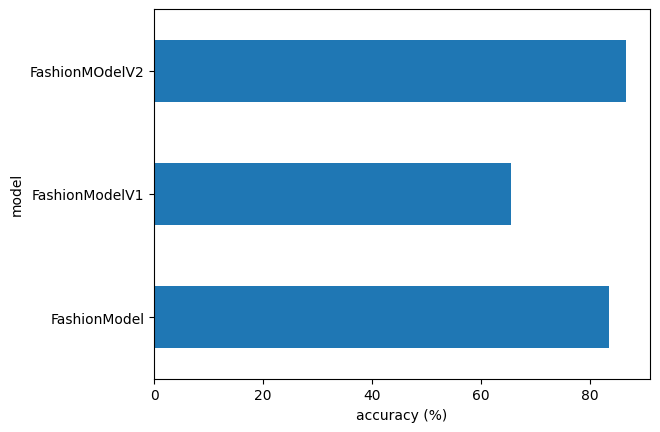

In [57]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [58]:
# make and evaluate

def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    model.to(device)

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())
        
    return torch.stack(pred_probs)


In [59]:
import random 
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

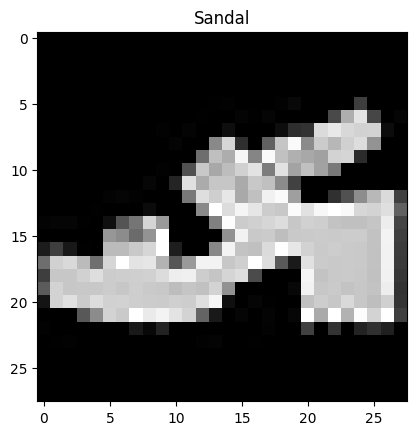

In [60]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [61]:
pred_probs = make_predictions(model_2, test_samples)
pred_probs[:2]

tensor([[5.0975e-07, 7.3245e-08, 1.7889e-07, 7.9840e-08, 2.2210e-08, 9.9948e-01,
         5.2076e-07, 4.9614e-05, 2.6487e-05, 4.4713e-04],
        [6.7325e-02, 2.5698e-01, 1.4497e-03, 1.1694e-01, 3.5665e-01, 5.0746e-05,
         1.9989e-01, 4.4672e-04, 1.0386e-04, 1.5906e-04]])

In [62]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 4, 7, 2, 3, 0, 4, 7, 1])

In [63]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

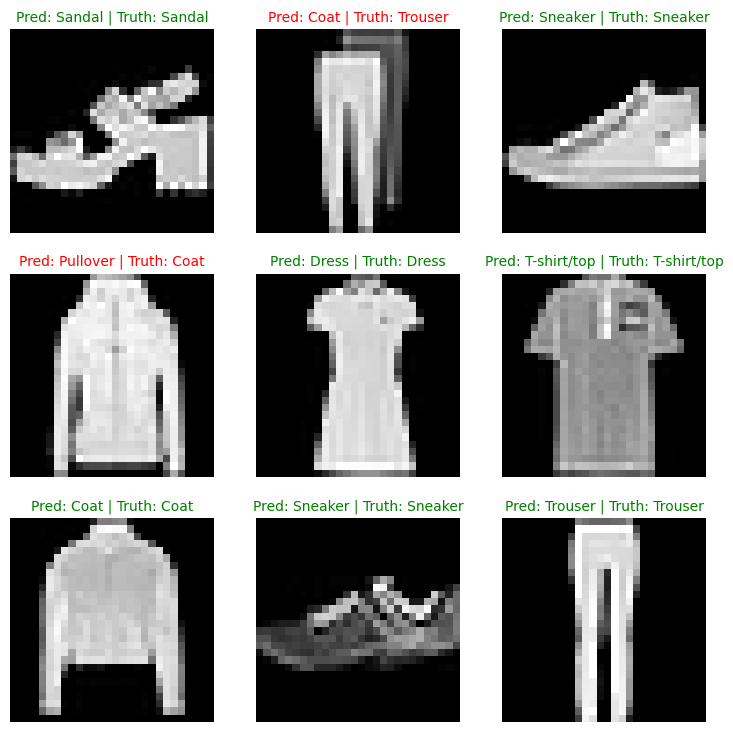

In [64]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in  enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[test_labels[i]]

    title = f"Pred: {pred_label} | Truth: {truth_label}"
    
    if pred_label == truth_label:
        plt.title(title, fontsize=10, c="g")
    else:
        plt.title(title, fontsize=10, c="r")
    
    plt.axis(False)

In [65]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions.."):
        X, y = X.to(device), y.to(device)

        y_logit = model_2(X)

        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())


print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]


Making predictions..: 100%|██████████| 313/313 [00:00<00:00, 676.13it/s]

[tensor([9, 2, 1, 1, 6, 3, 4, 6, 5, 7, 4, 5, 8, 3, 4, 3, 2, 6, 8, 0, 2, 7, 7, 5,
        3, 6, 6, 6, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 9, 6, 7, 2, 1, 4, 6, 4, 2, 5, 6, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 4, 3, 7, 8, 7, 0, 2, 3, 2, 3, 1, 2, 8, 4, 4, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 3, 8]), tensor([0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 2]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 8, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 2, 8, 4, 2, 6, 5, 4, 1, 2, 1, 3, 0, 8, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 6, 2,
        6, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 6, 0, 6, 3, 8, 9, 6, 1, 3, 6, 2, 3, 0, 8, 3, 7, 4,
       

tensor([9, 2, 1, 1, 6, 3, 4, 6, 5, 7])

In [68]:
import torchmetrics, mlxtend 
torchmetrics.__version__, mlxtend.__version__

('1.8.2', '0.24.0')

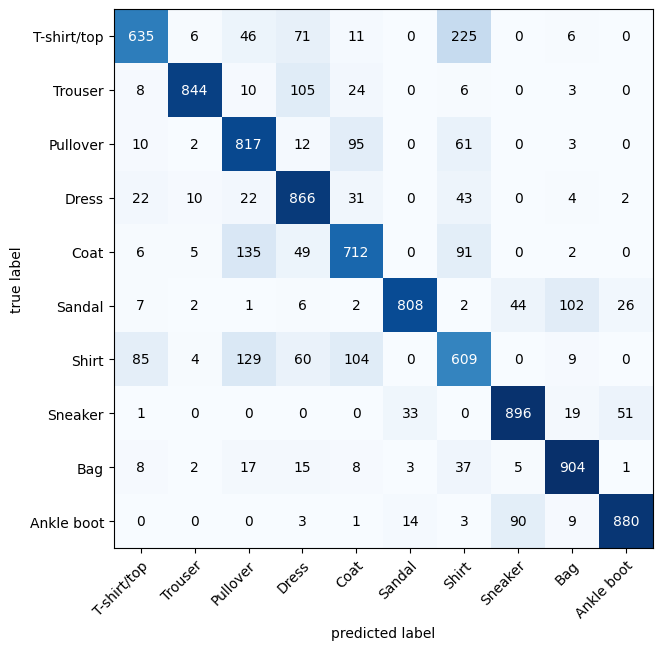

In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_dataset.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)